In [1]:
import pandas as pd

data_clf_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_clf_column = "Species"
data_clf = pd.read_csv("penguins_classification.csv")

In [8]:
data_reg_columns = ["Flipper Length (mm)"]
target_reg_column = "Body Mass (g)"
data_reg = pd.read_csv("penguins_regression.csv")

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay

def fit_and_plot_classification(model, data, feature_names, target_names):
    model.fit(data[feature_names], data[target_names])
    if data[target_names].nunique() == 2:
        palette = ["tab:red", "tab:blue"]
    else:
        palette = ["tab:red", "tab:blue", "black"]
    DecisionBoundaryDisplay.from_estimator(
        model,
        data[feature_names],
        response_method="predict",
        cmap="RdBu",
        alpha=0.5
    )
    sns.scatterplot(
        data=data,
        x=feature_names[0],
        y=feature_names[1],
        hue=target_names,
        palette=palette,
    )
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

def fit_and_plot_regression(model, data, feature_names, target_names):
    model.fit(data[feature_names], data[target_names])
    data_test = pd.DataFrame(
        np.arange(data.iloc[:, 0].min(), data.iloc[:, 0].max()),
        columns=data[feature_names].columns,
    )
    target_predicted = model.predict(data_test)
    sns.scatterplot(
        x=data.iloc[:, 0], y=data[target_names], color="black", alpha=0.5
    )
    plt.plot(data_test.iloc[:, 0], target_predicted, linewidth=4)

In [10]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

max_depth = 2
tree_clf = DecisionTreeClassifier(max_depth=max_depth)
tree_reg = DecisionTreeRegressor(max_depth=max_depth)

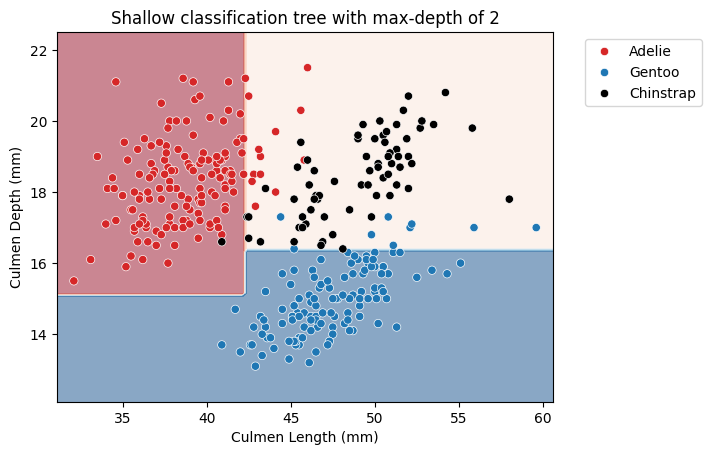

In [11]:
fit_and_plot_classification(
    tree_clf, data_clf, data_clf_columns, target_clf_column
)
_ = plt.title(f"Shallow classification tree with max-depth of {max_depth}")

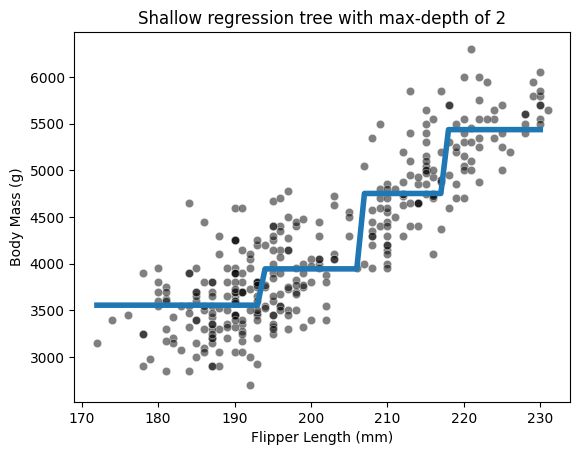

In [12]:
fit_and_plot_regression(
    tree_reg, data_reg, data_reg_columns, target_reg_column
)
_ = plt.title(f"Shallow regression tree with max-depth of {max_depth}")

In [13]:
max_depth = 30
tree_clf = DecisionTreeClassifier(max_depth=max_depth)
tree_reg = DecisionTreeRegressor(max_depth=max_depth)

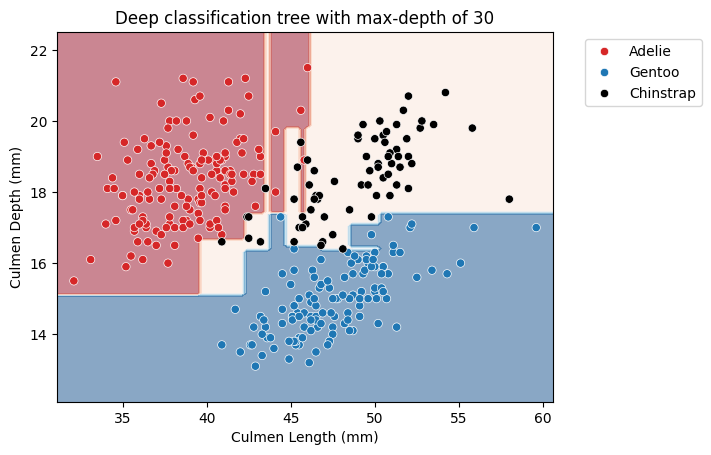

In [14]:
fit_and_plot_classification(
    tree_clf, data_clf, data_clf_columns, target_clf_column
)
_ = plt.title(f"Deep classification tree with max-depth of {max_depth}")

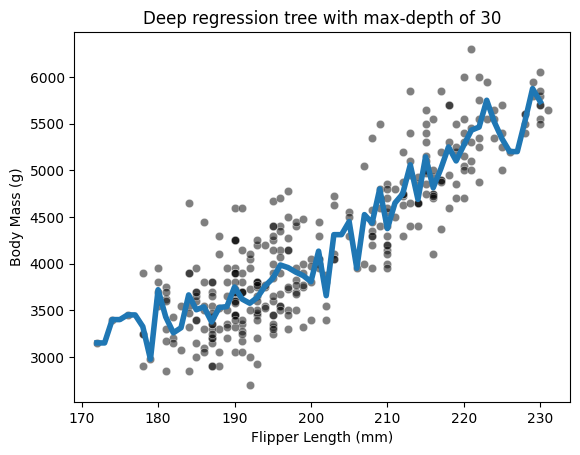

In [15]:
fit_and_plot_regression(
    tree_reg, data_reg, data_reg_columns, target_reg_column
)
_ = plt.title(f"Deep regression tree with max-depth of {max_depth}")

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {"max_depth": np.arange(2, 10, 1)}
tree_clf = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid)
tree_reg = GridSearchCV(DecisionTreeRegressor(), param_grid=param_grid)

Text(0.5, 1.0, 'Optimal depth found via CV: 6')

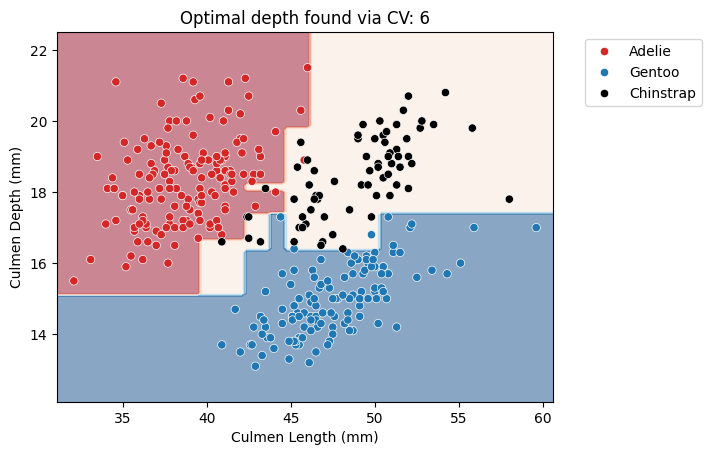

In [18]:
fit_and_plot_classification(
    tree_clf, data_clf, data_clf_columns, target_clf_column
)
plt.title(f"Optimal depth found via CV: {tree_clf.best_params_['max_depth']}")

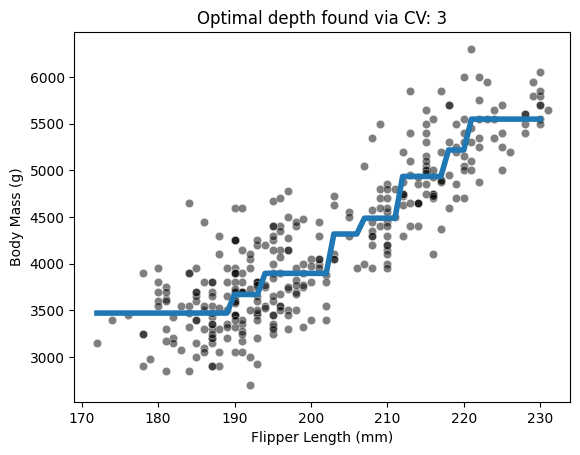

In [19]:
fit_and_plot_regression(
    tree_reg, data_reg, data_reg_columns, target_reg_column
)
_ = plt.title(
    f"Optimal depth found via CV: {tree_reg.best_params_['max_depth']}"
)

In [23]:
from sklearn.datasets import make_blobs

data_clf_columns = ["Feature #0", "Feature #1"]
target_clf_column = "Class"

#interlaced Blobs

X_1, y_1 = make_blobs(
    n_samples=300, centers=[[0, 0], [-1, -1]], random_state=0
)
#easily seperable blobs
X_2, y_2 = make_blobs(n_samples=300, centers=[[3,6], [7,0]], random_state=0)
X = np.concatenate([X_1, X_2], axis=0)
y = np.concatenate([y_1, y_2])
data_clf = np.concatenate([X, y[:, np.newaxis]], axis=1)
data_clf = pd.DataFrame(
    data_clf, columns=data_clf_columns + [target_clf_column]
)
data_clf[target_clf_column]= data_clf[target_clf_column].astype(np.int32)

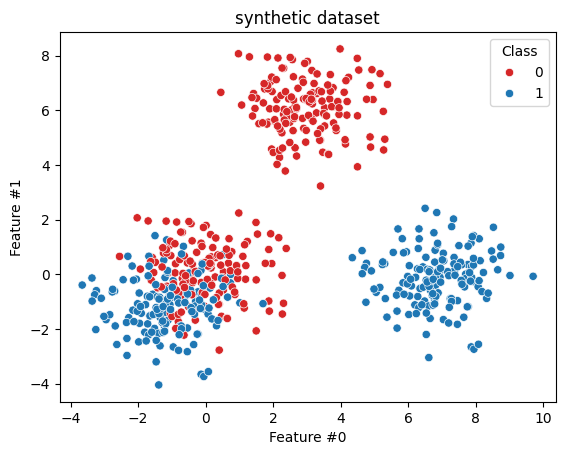

In [24]:
sns.scatterplot(
    data=data_clf,
    x = data_clf_columns[0],
    y = data_clf_columns[1],
    hue = target_clf_column,
    palette= ["tab:red", "tab:blue"]
)
_ = plt.title("synthetic dataset")

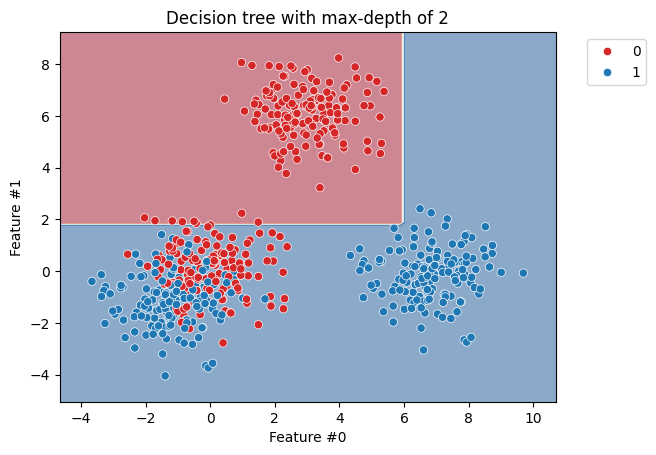

In [25]:
max_depth = 2
tree_clf = DecisionTreeClassifier(max_depth=max_depth)
fit_and_plot_classification(
    tree_clf, data_clf, data_clf_columns, target_clf_column
)
_ = plt.title(f"Decision tree with max-depth of {max_depth}")

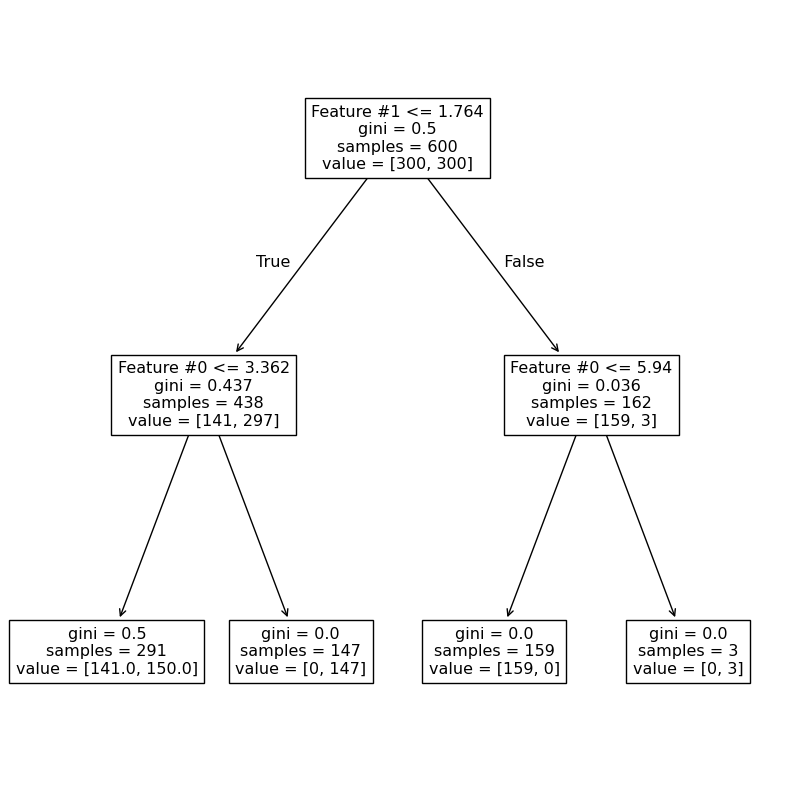

In [26]:
from sklearn.tree import plot_tree
_, ax = plt.subplots(figsize=(10, 10))
_ = plot_tree(tree_clf, ax=ax, feature_names=data_clf_columns)

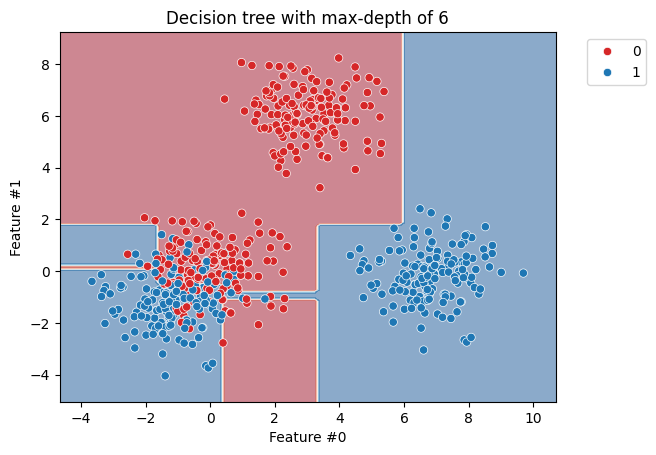

In [27]:
max_depth = 6
tree_clf = DecisionTreeClassifier(max_depth=max_depth)
fit_and_plot_classification(
    tree_clf, data_clf, data_clf_columns, target_clf_column
)
_ = plt.title(f"Decision tree with max-depth of {max_depth}")

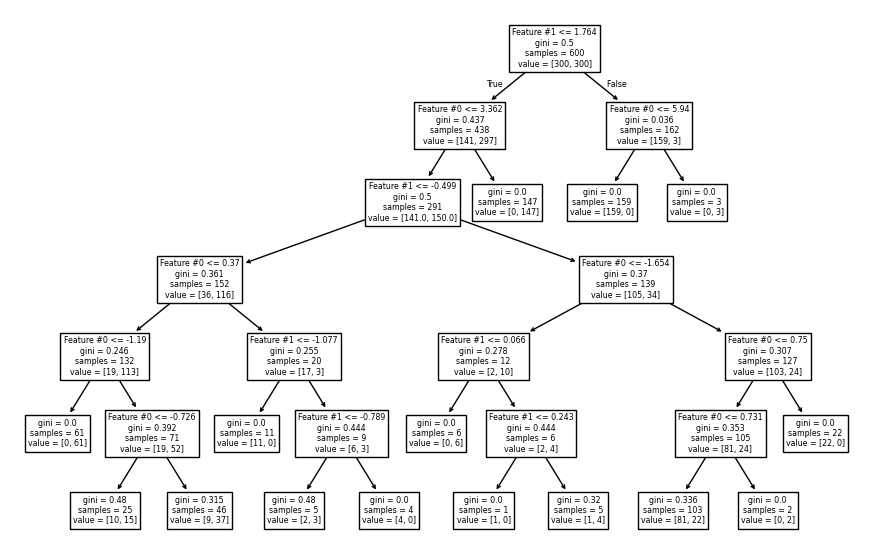

In [28]:
_, ax = plt.subplots(figsize=(11, 7))
_ = plot_tree(tree_clf, ax=ax, feature_names=data_clf_columns)

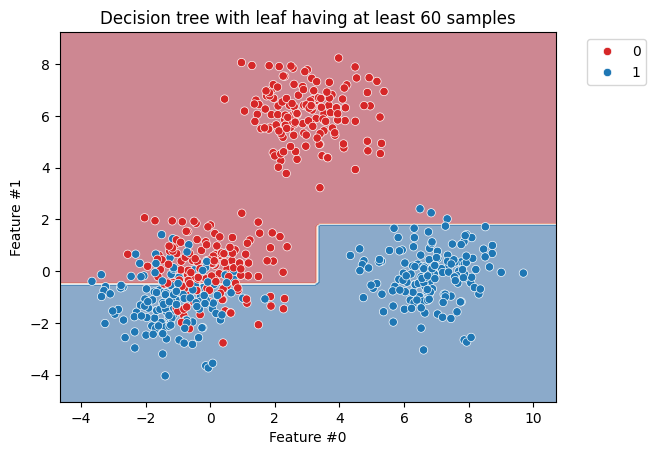

In [29]:
min_samples_leaf = 60
tree_clf = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
fit_and_plot_classification(
    tree_clf, data_clf, data_clf_columns, target_clf_column
)
_ = plt.title(
    f"Decision tree with leaf having at least {min_samples_leaf} samples"
)

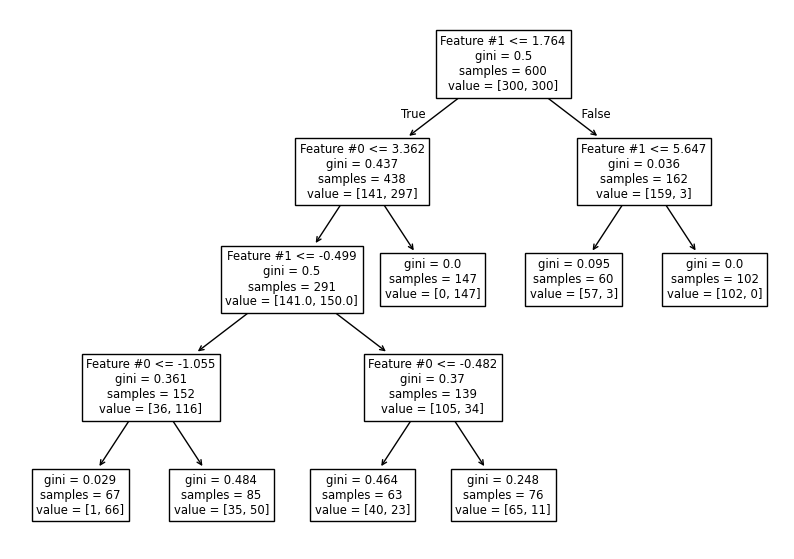

In [30]:
_, ax = plt.subplots(figsize=(10, 7))
_ = plot_tree(tree_clf, ax=ax, feature_names=data_clf_columns)